<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/a_kmeans_clustering_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part A
## Assignment Description
K-Means clustering from Scratch:

Hints:   
1. [K-Means algorithm using Python from scratch](https://colab.sandbox.google.com/github/SANTOSHMAHER/Machine-Learning-Algorithams/blob/master/K_Means_algorithm_using_Python_from_scratch_.ipynb)

2. [05.11-K-Means.ipynb](https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb)

3. [Clustering with k-means: Programming Exercise](https://developers.google.com/machine-learning/clustering/programming-exercise)

4. [Clustering - Supervised Similarity with Chocolates](https://colab.sandbox.google.com/github/google/eng-edu/blob/main/ml/clustering/clustering-supervised-similarity.ipynb?utm_source=ss-clustering&utm_campaign=colab-external&utm_medium=referral&utm_content=clustering-supervised-similarity#scrollTo=eExms-TP8Hn6)

Dataset Source:

[Facebook Live Sellers in Thailand](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)

Dehouche,Nassim. (2019). Facebook Live Sellers in Thailand. UCI Machine Learning Repository. https://doi.org/10.24432/C5R60S.

Sources Used:
1. ChatGPT-4
2. All listed hints

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Manual K-Means Clustering Function


In [5]:
# K-means clustering implementation
def k_means_clustering(data, k, max_iterations=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        # Assign clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[closest_cluster == k].mean(axis=0) for k in range(centroids.shape[0])])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, closest_cluster

### Load Dataset


In [6]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_a/live_20210128.csv'

In [7]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
data = pd.read_csv(file_path)

### Select Relevant Features

In [8]:
# Selecting relevant features
features = data[['num_reactions', 'num_comments', 'num_shares']]
features.fillna(0, inplace=True)  # Handling missing values

<ipython-input-8-468b35cb9f54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values


### Standardize Features

In [9]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Elbow Plot


In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['num_reactions', 'num_comments', 'num_shares']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

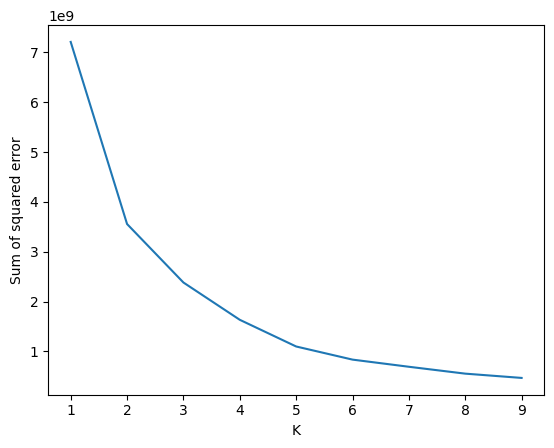

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Apply K-means Clustering

In [12]:
# Applying K-means clustering
k = 3  # Number of clusters
centroids, clusters = k_means_clustering(features_scaled, k)

### Data Visualizations

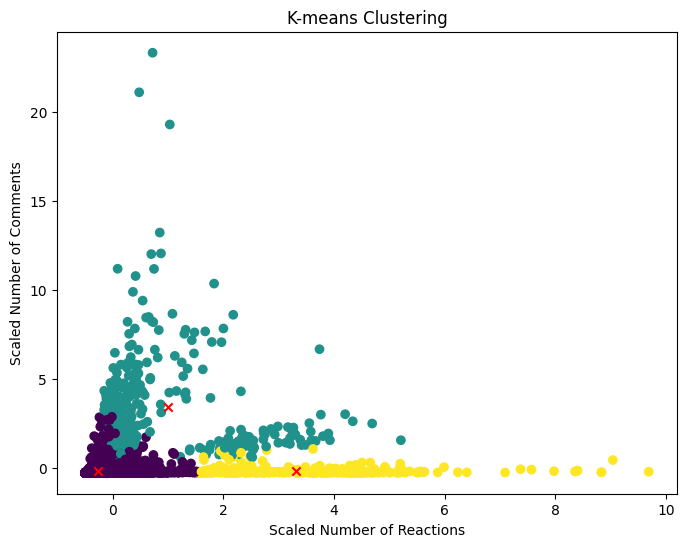

In [13]:
# Plotting (if desired and applicable)
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Centroids
plt.title('K-means Clustering')
plt.xlabel('Scaled Number of Reactions')
plt.ylabel('Scaled Number of Comments')
plt.show()
